In [26]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [27]:
labels = pd.read_table('../Datasets/human_dataset.txt')['class'].to_numpy()
dna_spectral_representation = np.load('../Saved Data/dna_spectral_representation.npy')
k = int(json.load(open('config.json'))['k'])
input_vector_size = np.power(4, k)

In [28]:
X_train_full, X_test, y_train_full, y_test = train_test_split(dna_spectral_representation, labels, test_size = 0.2,
                                                                random_state=20)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.1,
                                                        random_state=20)
np.save('../Saved Data/Test Set/X_test.npy', X_test)
np.save('../Saved Data/Test Set/y_test.npy', y_test)

# Model : LeNet5 like Architecture CNN for Text Classification

In [29]:
model = keras.Sequential()

model.add(keras.layers.Conv1D(filters=30, kernel_size=(5), activation='relu', input_shape=(input_vector_size,1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Conv1D(filters=15, kernel_size=(5), activation='relu', input_shape=(int(input_vector_size / 2),1),padding="same"))
model.add(keras.layers.MaxPooling1D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=128, activation='relu'))

model.add(keras.layers.Dense(units=64, activation='relu'))

model.add(keras.layers.Dense(units=7, activation = 'softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1024, 30)          180       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 512, 30)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 512, 15)           2265      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 256, 15)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3840)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.045,momentum = 0.0)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [32]:
earlyStop = keras.callbacks.EarlyStopping(monitor='loss', patience=1 , mode="min")
# class_weight = {0 : 0.121233,
#                 1 : 0.121918,
#                 2 : 0.079680,
#                 3 : 0.153425,
#                 4 : 0.162329,
#                 5 : 0.054795,
#                 6 : 0.306621}
# class_weight = class_weight,
history = model.fit(X_train, y_train, epochs=7 ,validation_data=(X_valid, y_valid),
                    batch_size = 32 , callbacks = [earlyStop])

Epoch 1/7
99/99 [==============================] - 2s 18ms/step - loss: 1.7495 - accuracy: 0.3628 - val_loss: 1.5043 - val_accuracy: 0.4986
Epoch 2/7
99/99 [==============================] - 2s 17ms/step - loss: 1.3313 - accuracy: 0.5176 - val_loss: 1.1614 - val_accuracy: 0.5840
Epoch 3/7
99/99 [==============================] - 2s 17ms/step - loss: 1.0115 - accuracy: 0.6575 - val_loss: 0.8167 - val_accuracy: 0.7293
Epoch 4/7
99/99 [==============================] - 2s 18ms/step - loss: 0.7515 - accuracy: 0.7450 - val_loss: 0.7246 - val_accuracy: 0.7664
Epoch 5/7
99/99 [==============================] - 2s 18ms/step - loss: 0.4634 - accuracy: 0.8528 - val_loss: 0.4523 - val_accuracy: 0.8661
Epoch 6/7
99/99 [==============================] - 2s 18ms/step - loss: 0.3480 - accuracy: 0.8966 - val_loss: 0.4822 - val_accuracy: 0.8376
Epoch 7/7
99/99 [==============================] - 2s 17ms/step - loss: 0.1200 - accuracy: 0.9673 - val_loss: 0.4692 - val_accuracy: 0.8632


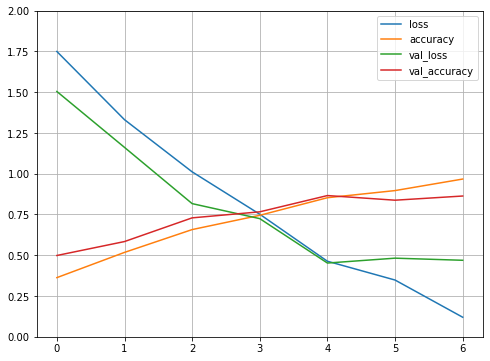

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [34]:
model.save("../Saved Data/Model/")
model.save("../Saved Data/Model Architecture/model.h5")
print("Saved model to disk")

INFO:tensorflow:Assets written to: ../Saved Data/Model/assets


INFO:tensorflow:Assets written to: ../Saved Data/Model/assets


Saved model to disk
